In [2]:
from pythonds.graphs import Graph, Vertex
from pythonds.basic import Queue
from graphviz import Digraph

## Small examples of DFS and BFS

In [4]:
dot = Digraph()

g = Graph()
for i in range(1,9):
    dot.node(str(i))

g.addEdge(5,3)
dot.edge(str(5), str(3))

g.addEdge(5,7)
dot.edge(str(5), str(7))

g.addEdge(3,2)
dot.edge(str(3), str(2))

g.addEdge(3,4)
dot.edge(str(3), str(4))

g.addEdge(7,8)
dot.edge(str(7), str(8))

g.addEdge(4,8)
dot.edge(str(4), str(8))

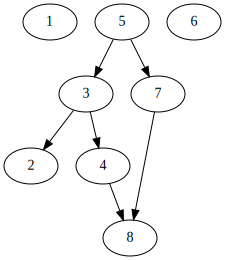

In [5]:
dot

## DFS on small graph

In [6]:
def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        # This is implicitly using a stack (the call stack)
        for nbr in g.getVertex(node).getConnections():
            dfs(visited, graph, nbr.getId())


In [7]:
dfs(set(), g, 5) # Starting at 5

5
3
2
4
8
7


## BFS on the same graph

In [8]:
def bfs(visited, graph, node):
    visited.add(node)
    queue.append(node)

    while queue:
        m = queue.pop(0) 
        print (m) 

        for nbr in g.getVertex(m).getConnections():
            if nbr.getId() not in visited:
                visited.add(nbr.getId())
                queue.append(nbr.getId())

In [9]:
queue = []
bfs(set(), g, 5)

5
3
7
2
4
8


## Using BFS for a word ladder

In [11]:
def build_graph(word_file, with_graphviz=False):
    if with_graphviz:
        dot = Digraph()
        
    d = {}
    g = Graph()
    wfile = open(word_file, 'r')
    
    # create buckets of words that differ by one letter
    for line in wfile:
        #print(line[:-1])
        word = line[:-1]
        for i in range(len(word)):
            bucket = word[:i] + "_" + word[i+1:]
            #print(bucket)
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
        #print()
    #print(list(d.keys()), len(d.keys()))
    
    subset_count = 0
    found_word = False
    
    for bucket in d.keys():
        for word1 in d[bucket]:
            if word1 == "FOOL":
                found_word = True
            for word2 in d[bucket]:
                if word1 != word2:
                    if with_graphviz and subset_count <= 60 and found_word:
                        dot.node(word1)
                        dot.node(word2)
                        dot.edge(word1, word2)
                        subset_count += 1
                    g.addEdge(word1, word2)

    if with_graphviz:
        return g, dot
    
    return g

In [12]:
def traverse(y):
    x = y
    while x.getPred():
        print(x.getId())
        x = x.getPred()
    print(x.getId())

In [13]:
# Breadth First Searching
def bfs(g, start):
    start.setDistance(0)
    start.setPred(None)
    vertQueue = Queue()
    vertQueue.enqueue(start)
    while vertQueue.size() > 0:
        currentVert = vertQueue.dequeue()
            
        
        if currentVert.getId() == "FOOL":
            print("Neighboring nodes for FOOL:")
            for nbr in currentVert.getConnections():
                print(nbr.getId())
            print()
        
        for nbr in currentVert.getConnections():
            if nbr.getColor() == 'white':
                nbr.setColor('gray')
                nbr.setDistance(currentVert.getDistance() + 1)
                nbr.setPred(currentVert)
                vertQueue.enqueue(nbr)
        currentVert.setColor('black')
     

Neighboring nodes for FOOL:
COOL
MOOL
POOL
TOOL
WOOL
FOAL
FOIL
FOUL
FOWL
FOOD
FOOT

SAGE
SALE
SALL
MALL
MOLL
MOOL
FOOL


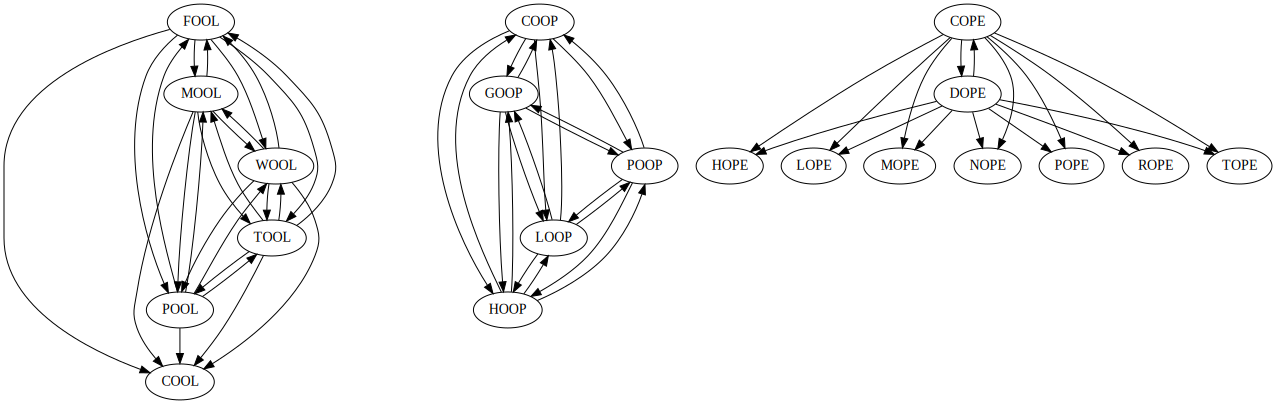

In [14]:
word_graph, dot = build_graph("fourletterwords.txt", with_graphviz=True)
bfs(word_graph, word_graph.getVertex('FOOL'))
traverse(word_graph.getVertex('SAGE'))
dot